## Simple Dask Demo

### Simple Code

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 1.98 ms, sys: 247 µs, total: 2.22 ms
Wall time: 3 s


### Parallelize with the <i><small>dask.delayed</small></i> decorator

In [3]:
from dask import delayed

In [4]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 2.14 ms, sys: 206 µs, total: 2.35 ms
Wall time: 1.08 ms


### Compute the real value

In [5]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 4.26 ms, sys: 402 µs, total: 4.66 ms
Wall time: 2 s


5

### Type Delayed

In [6]:
z

Delayed('add-dbe25942-ce98-4e4c-8559-3a5aaca85991')

### View the exec plan

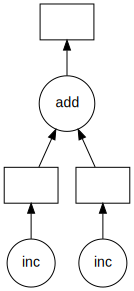

In [7]:
# Look at the task graph for `z`
z.visualize(filename='demo1.svg')

### Parallelize a for loop

In [8]:
# Data 
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 2.42 ms, sys: 209 µs, total: 2.63 ms
Wall time: 8.01 s


In [10]:
# Get Total value
total

44

In [11]:
%%time
# Parallel code
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-a5c1d71c-adf9-4d2a-93f7-a8179e438d1f')
After computing : 44
CPU times: user 7.41 ms, sys: 10.1 ms, total: 17.5 ms
Wall time: 1.01 s


In [12]:
# Delayed 
total

Delayed('sum-a5c1d71c-adf9-4d2a-93f7-a8179e438d1f')

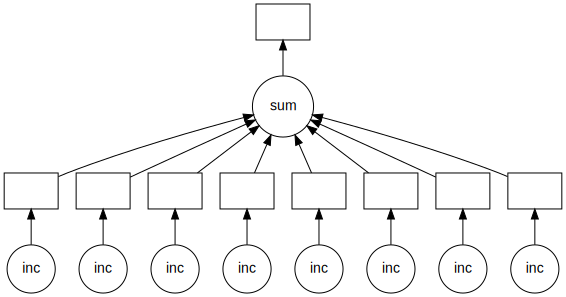

In [13]:
# Look at the task graph for `total`
total.visualize(filename='demo2.svg')

### Parallelize a for loop with control flow

In [14]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [15]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 1.83 ms, sys: 262 µs, total: 2.09 ms
Wall time: 10 s


In [16]:
%%time
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

CPU times: user 5.96 ms, sys: 275 µs, total: 6.24 ms
Wall time: 2.93 ms


In [17]:
%time total.compute()

CPU times: user 0 ns, sys: 8.36 ms, total: 8.36 ms
Wall time: 2.01 s


90

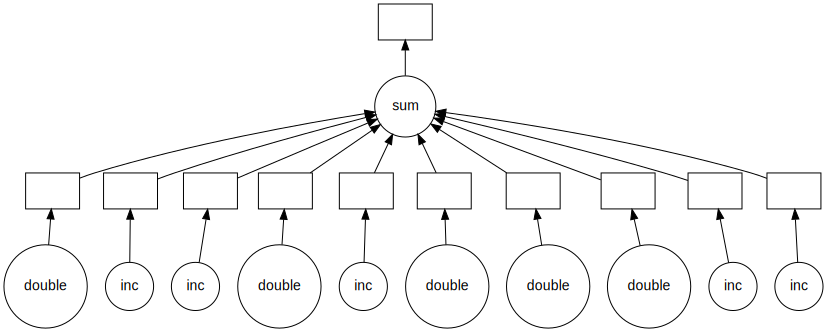

In [18]:
total.visualize(filename='demo3.svg')